# **Value-at-Risk (VaR) Estimator (Work In Progress)**

## **Contents**
1. [Introduction](#Introduction)
2. [Risk Functions](#Risk-Functions)
   * [Value-at-Risk (VaR)](#Value-at-Risk-(VaR))
   * [Expected Shortfall (ES)](#Expected-Shortfall-(ES))
   * [Range Value-at-Risk (RVaR)](#Range-Value-at-Risk-(RVaR))
3. [Historical Method](#Historical-Method)
   * [Application of the Historical Method](#Application-of-the-Historical-Method)
   * [Python Implementation of the Historical-Method](#Python-Implementation-of-the-Historical-Method)
4. [Parametric Method](#Parametric-Method)
   * [Application of the Parametric Method](#Application-of-the-Parametric-Method)
   * [Python Implementation of the Parametric Method](#Python-Implementation-of-the-Parametric-Method)
5. [Monte Carlo Method](#Monte-Carlo-Method)
   * [Application of the Parametric Method](#Application-of-the-Parametric-Method)
   * [Python Implementation of the Parametric Method](#Python-Implementation-of-the-Parametric-Method)
6. [Credits](#Credits)

## **Introduction**
The purpose of this project is to provide a method to immediately estimate, using Python, the Value-at-Risk (VaR), and related risk functions, of a portfolio of risk-bearing assets. The `time`, `datetime`, `numpy`, `scipy`, `sympy`, `pandas`, `matplotlib`, `seaborn`, `yfinance`, `pypfopt`, `riskfolio` and `warnings` libraries will be imported. Moreover, a random seed value is set for reprodicibility and the plot styles are modified for aesthetic reasons.

In [64]:
import time as tm
import datetime as dt
import numpy as np
import scipy as sp
import sympy as smp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pypfopt as ppf
import riskfolio as rsk
import warnings as wrn

np.random.seed(30)
palette = sns.color_palette("viridis_r", as_cmap=True)
sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})
wrn.simplefilter(action='ignore', category=FutureWarning)

tickers = ["MSFT", "AAPL"]
start_date = "2018-01-01"
end_date = "2022-01-01"
N = len(tickers)
weights = np.ones(N) / N
alpha = 0.05
beta = 0.01
show_performance_metrics = True
show_visualizations = True
data = yf.download(tickers, start_date, end_date, progress = False)["Adj Close"]
data.head()

Ticker,AAPL,MSFT
Date,,
2018-01-02,40.670975,80.080925
2018-01-03,40.663887,80.453606
2018-01-04,40.852776,81.161720
2018-01-05,41.317902,82.167969
2018-01-08,41.164433,82.251816


## **Risk Functions**
Let $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ be a probability space, let $(\mu, \sigma)$ be an ordered pair in $\mathbb{R}^{*} \times \mathbb{R}_{+}^{*}$, let $(S_{t})_{t \in \mathbb{R}_{+}}$ be a geometric Brownian motion with percentage drift $\mu$ and percentage volatility $\sigma$ on $\left(\Omega, \mathscr{F}, \mathbb{P}\right)$ such that $S_{0} \substack{\mathbb{P}\text{-a.s.} \\ \neq} 0$ and let $(h, \alpha)$ be an ordered pair in $\mathbb{R}_{+}^{*} \times ]0,1[$.
- The *profit-and-loss distribution of $(S_{t})_{t \in \mathbb{R}_{+}}$ at horizon $h$* is the stochastic process denoted by $(L_{t, h})_{t \in \mathbb{R}_{+}}$ and defined by:
$$\forall (\omega, t) \in \Omega \times \mathbb{R}_{+}, \enspace L_{t, h}(\omega) = S_{t + h}(\omega) - S_{t}(\omega)$$
- The *relative return distribution of $(S_{t})_{t \in \mathbb{R}_{+}}$ at horizon $h$* is the stochastic process denoted by $(R_{t, h})_{t \in \mathbb{R}_{+}}$ and defined by:
$$\forall (\omega, t) \in \Omega \times \mathbb{R}_{+}, \enspace R_{t, h}(\omega) = \frac{S_{t + h}(\omega) - S_{t}(\omega)}{S_{t}(\omega)}$$
Here, the stochastic process $(S_{t})_{t \in \mathbb{R}_{+}}$ can represent the price of a single risk-bearing financial asset, or the overall value of a portfolio of risk-bearning financial asset.

### **Value-at-Risk (VaR)**
For every positive real number $t$ in $\mathbb{R}_{+}$ the *Value-at-Risk (VaR) of $S_{t}$ at siginificance level $\alpha$ and horizon $h$* is the real number denoted by $\mathrm{VaR}_{\alpha, h}\left(S_{t}\right)$ and defined by:
$$\mathrm{VaR}_{\alpha, h}\left(S_{t}\right) = -\inf\left(\left\{x \in \mathbb{R} \colon \enspace F_{L_{t, h}}(x) > \alpha\right\}\right)$$

### **Expected Shortfall (ES)**
For every positive real number $t$ in $\mathbb{R}_{+}$ the *Expected Shortfall (ES) of $S_{t}$ at siginificance level $\alpha$ and horizon $h$* is the real number denoted by $\mathrm{ES}_{\alpha, h}\left(S_{t}\right)$ and defined by:
$$\mathrm{ES}_{\alpha, h}\left(S_{t}\right) = -\frac{1}{\alpha}\int_{0}^{\alpha}\mathrm{VaR}_{\gamma, h}\left(S_{t}\right)\mathrm{d}\gamma$$
The expected shortfall is also called the Conditional Value-at-Risk (CVaR).


### **Range Value-at-Risk (RVaR)**
Let $\beta$ be a strictly positive real number in $]0,1[$ such that $\alpha > \beta$. For every positive real number $t$ in $\mathbb{R}_{+}$ the *Range Value-at-Risk of $S_{t}$ between siginificance levels $\beta$ and $\alpha$ and at horizon $h$* is the real number denoted by $\mathrm{RVaR}_{\alpha, \beta, h}\left(S_{t}\right)$ and defined by:
$$\mathrm{RVaR}_{\alpha, \beta, h}\left(S_{t}\right) = -\frac{1}{\alpha - \beta}\int_{\beta}^{\alpha}\mathrm{VaR}_{\gamma, h}\left(S_{t}\right)\mathrm{d}\gamma$$

One property that these risk functions share is the following inequality:
$$\mathrm{VaR}_{\alpha, h}\left(S_{t}\right) \leqslant \mathrm{RVaR}_{\alpha, \beta, h}\left(S_{t}\right) \leqslant \mathrm{ES}_{\alpha, h}(S_{t})$$
which is guaranteed to hold true provided that the moment generating function $\mathbf{M}_{S_{t}}$ of the random variable $S_{t}$ exists and is well-defined. 

In most cases, the exact values of each of the above three risk functions cannot be calculated directly. There are, however, three methods that stand out in calculating each of them: 
- The historical method (which estimates the values of the risk functions from the quantiles of past data of the profit-and-loss distribution of the underlying geometric Brownian motion);
- The parametric method (which estimates the values of the risk functions from the parameters of the distribution of past data of the profit-and-loss distribution of the underlying geometric Brownian motion), and;
- The Monte Carlo method (which estimates the values of the risk functions by repeated random sampling from the distribution of past data of the profit-and-loss distribution of the underlying geometric Brownian motion)

The details of each of the above three methods, as well as their Python implementation, is given in the following sections.

## **Historical Method**
### **Application of the Historical Method**
The following is a general procedure for estimating the risk functions via the historical method:
1. Retrieve the historical price data of the underlying asset or portfolio of assets, the frequency being the time horizon of choice;
2. Calculate the profit-and-loss distribution corresponding to this historical price data;
3. Determine the relevant estimates of the values of the risk functions as follows:
   * In order to calculate $\mathrm{VaR}_{\alpha, h}(S_{t})$, select the negative of the $\alpha$-quantile of the profit-and-loss distribution.
   * In order to calculate $\mathrm{ES}_{\alpha, h}(S_{t})$, calculate the negative of the mean of all values in the profit-and-loss distribution not exceeding its $\alpha$-quantile.
   * In order to calculate $\mathrm{RVaR}_{\alpha, \beta, h}(S_{t})$, calculate the negative of the mean of all values in the profit-and-loss distribution not between its $\alpha$-quantile and its $\beta$-quantile.
The historical method makes no *a priori* assumption about the profit-and-loss distribution. It only retireves the quantiles of interest.

### **Python Implementation of the Historical Method**
The Python implementation of the historical method for estimating the values of the above three risk functions is given in the code cell below.

Significance level: α = 0.05
Time horizon: 1 day
Estimated VaR: 3.65 units of local currency
Computation time: 0.000 seconds


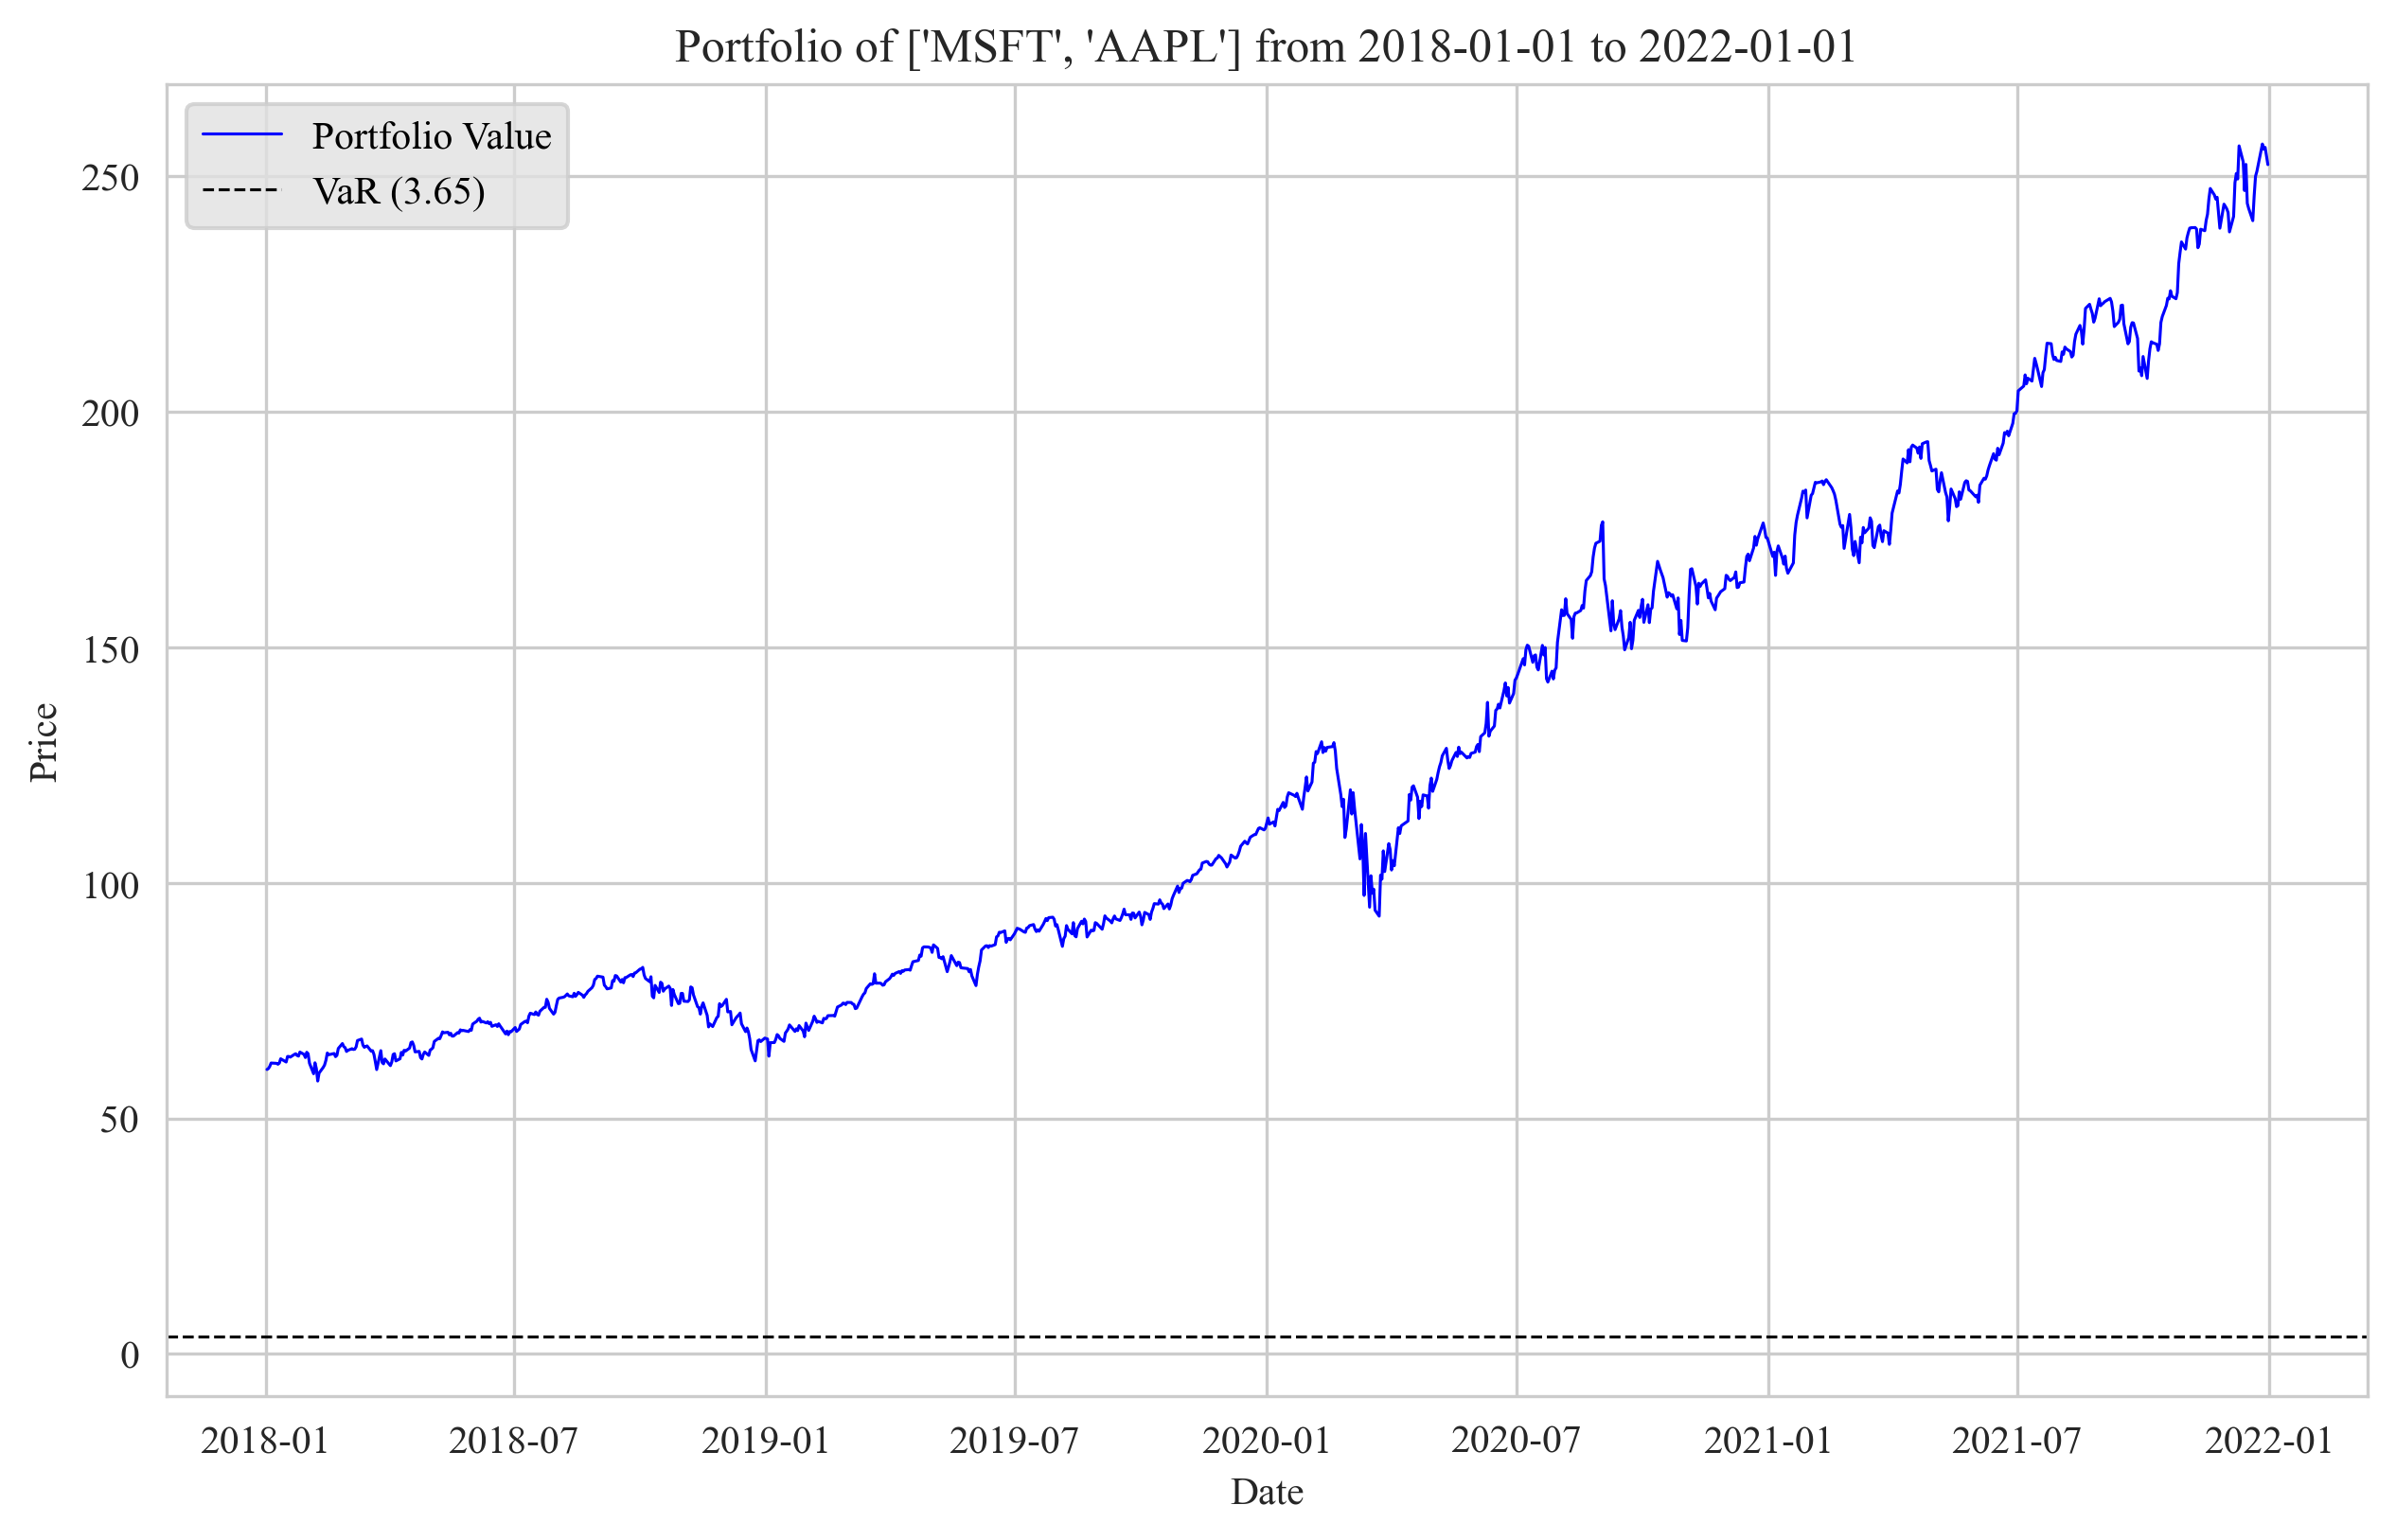

Significance level: α = 0.05
Time horizon: 1 day
Estimated ES: 5.48 units of local currency
Computation time: 0.005 seconds


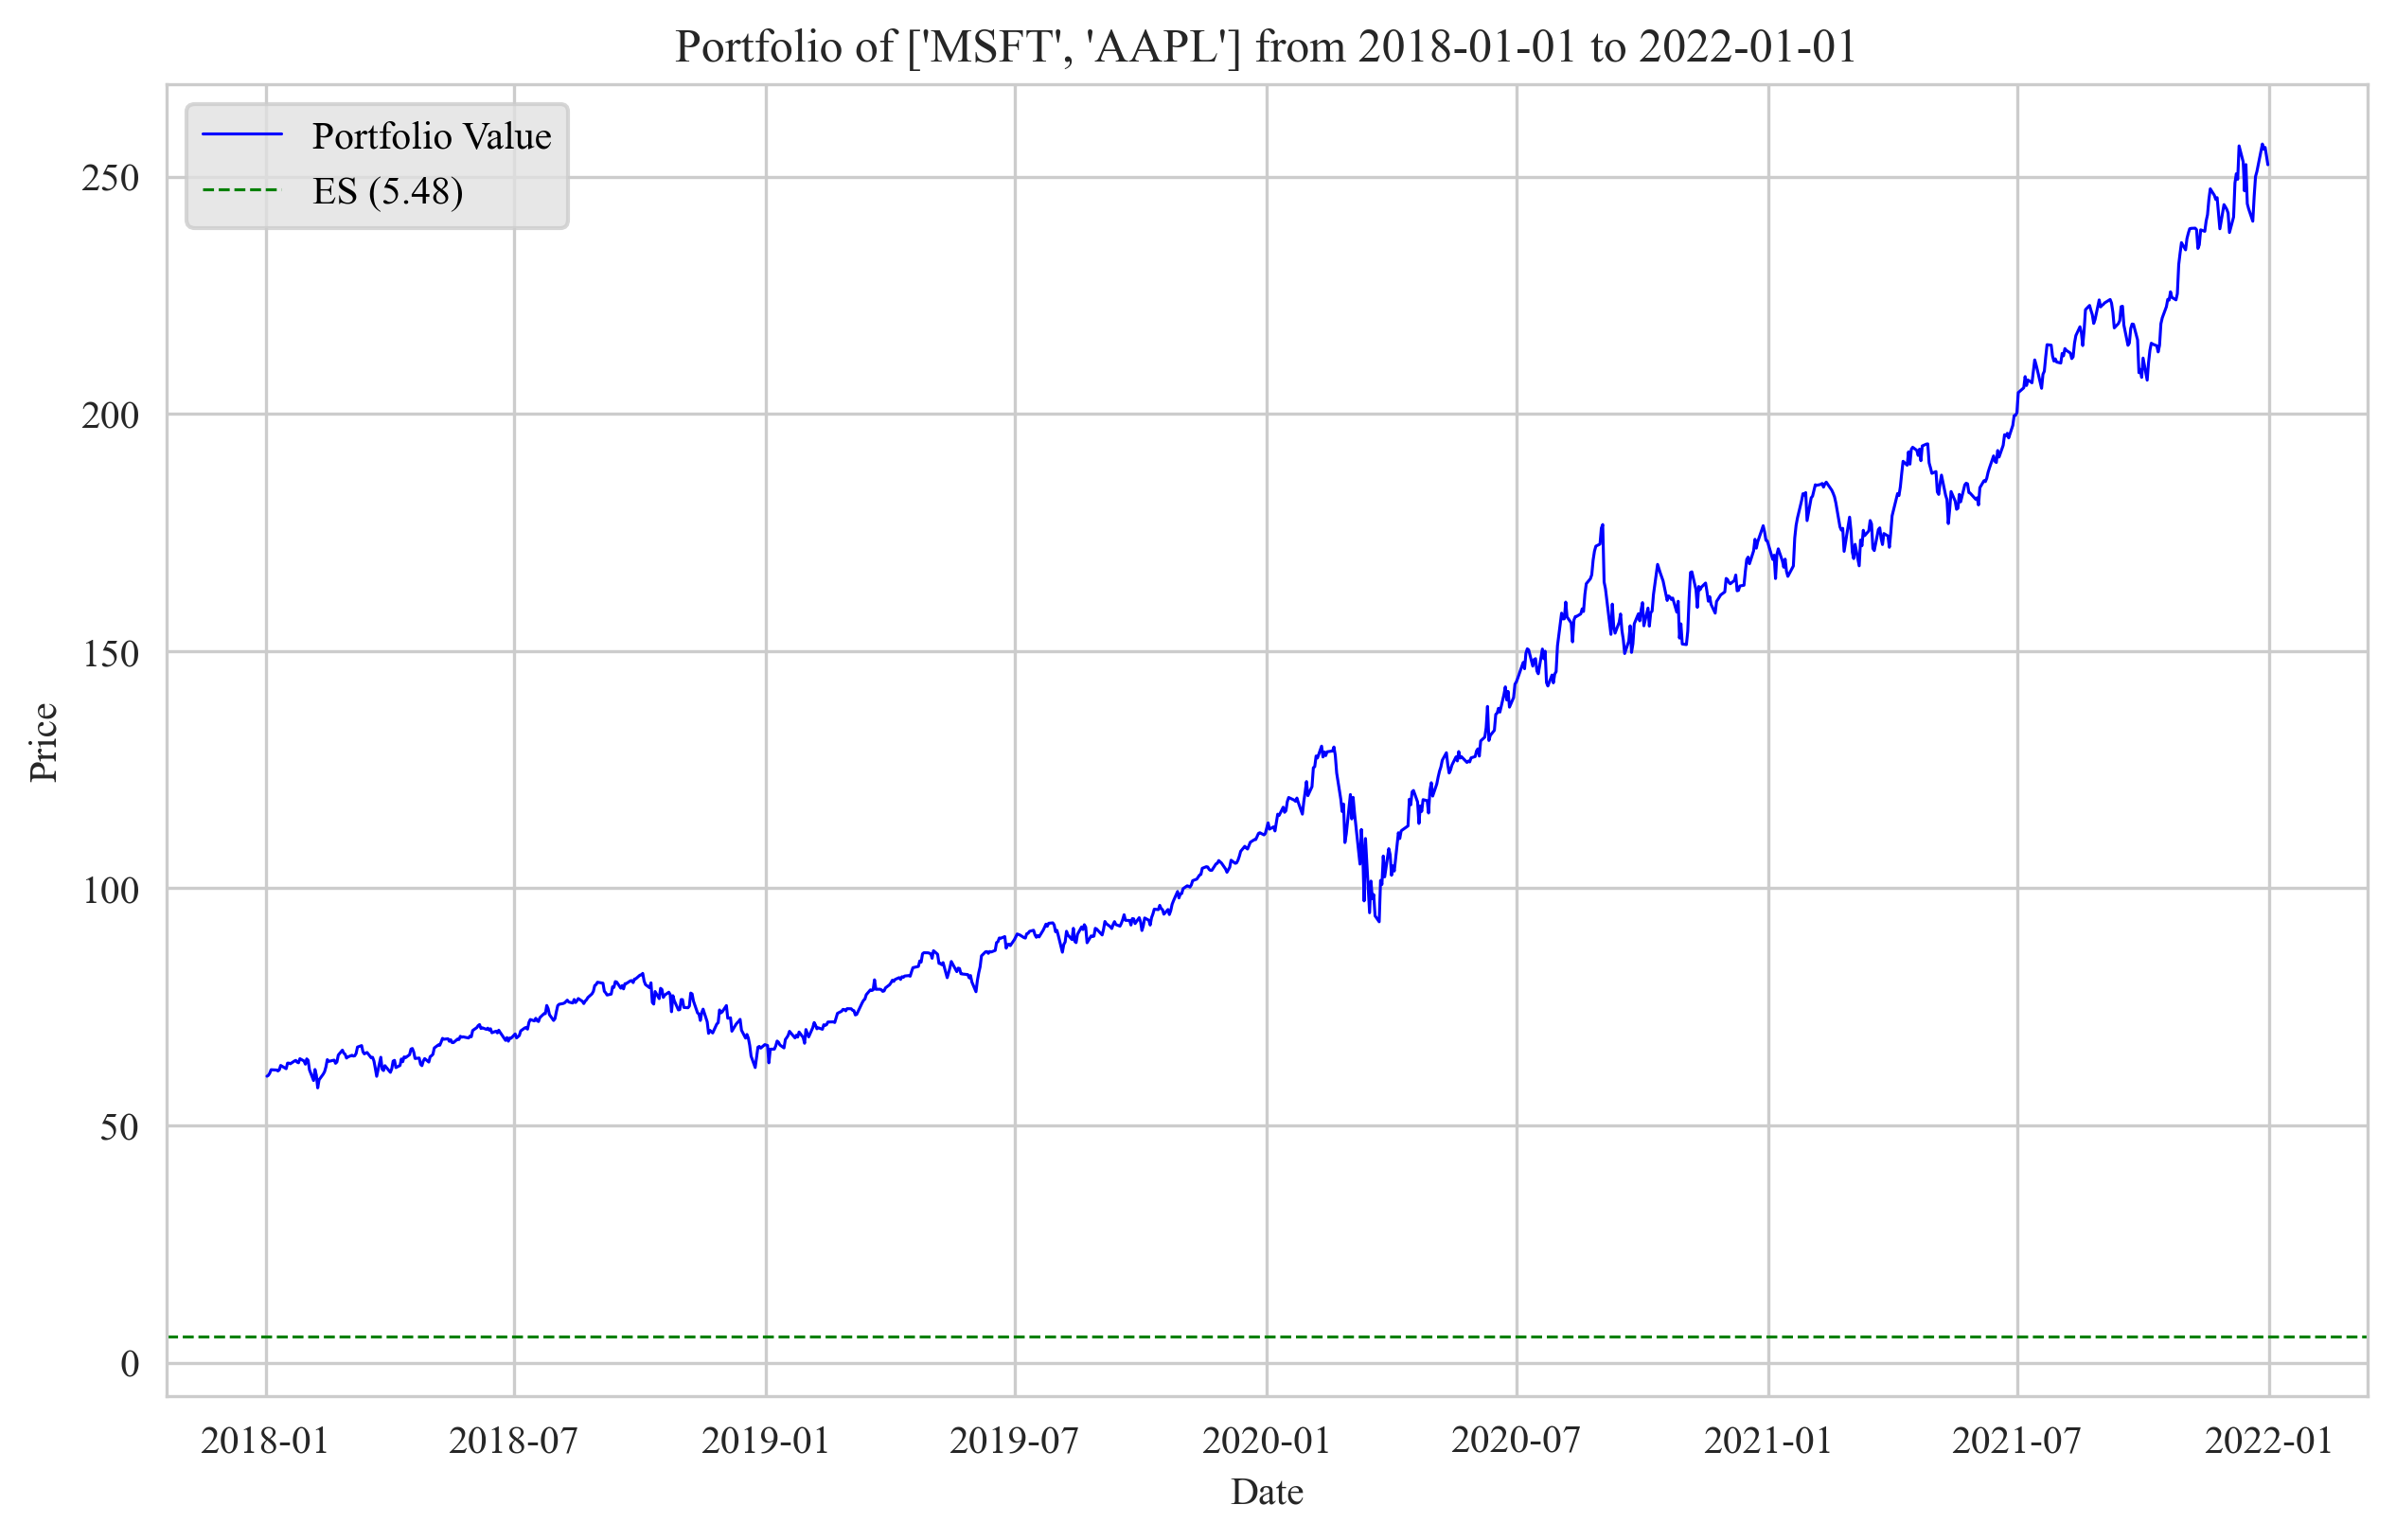

Lower significance level: α = 0.05
Upper significance level: β = 0.01
Time horizon: 1 day
Estimated RVaR: 4.84 units of local currency
Computation time: 0.000 seconds


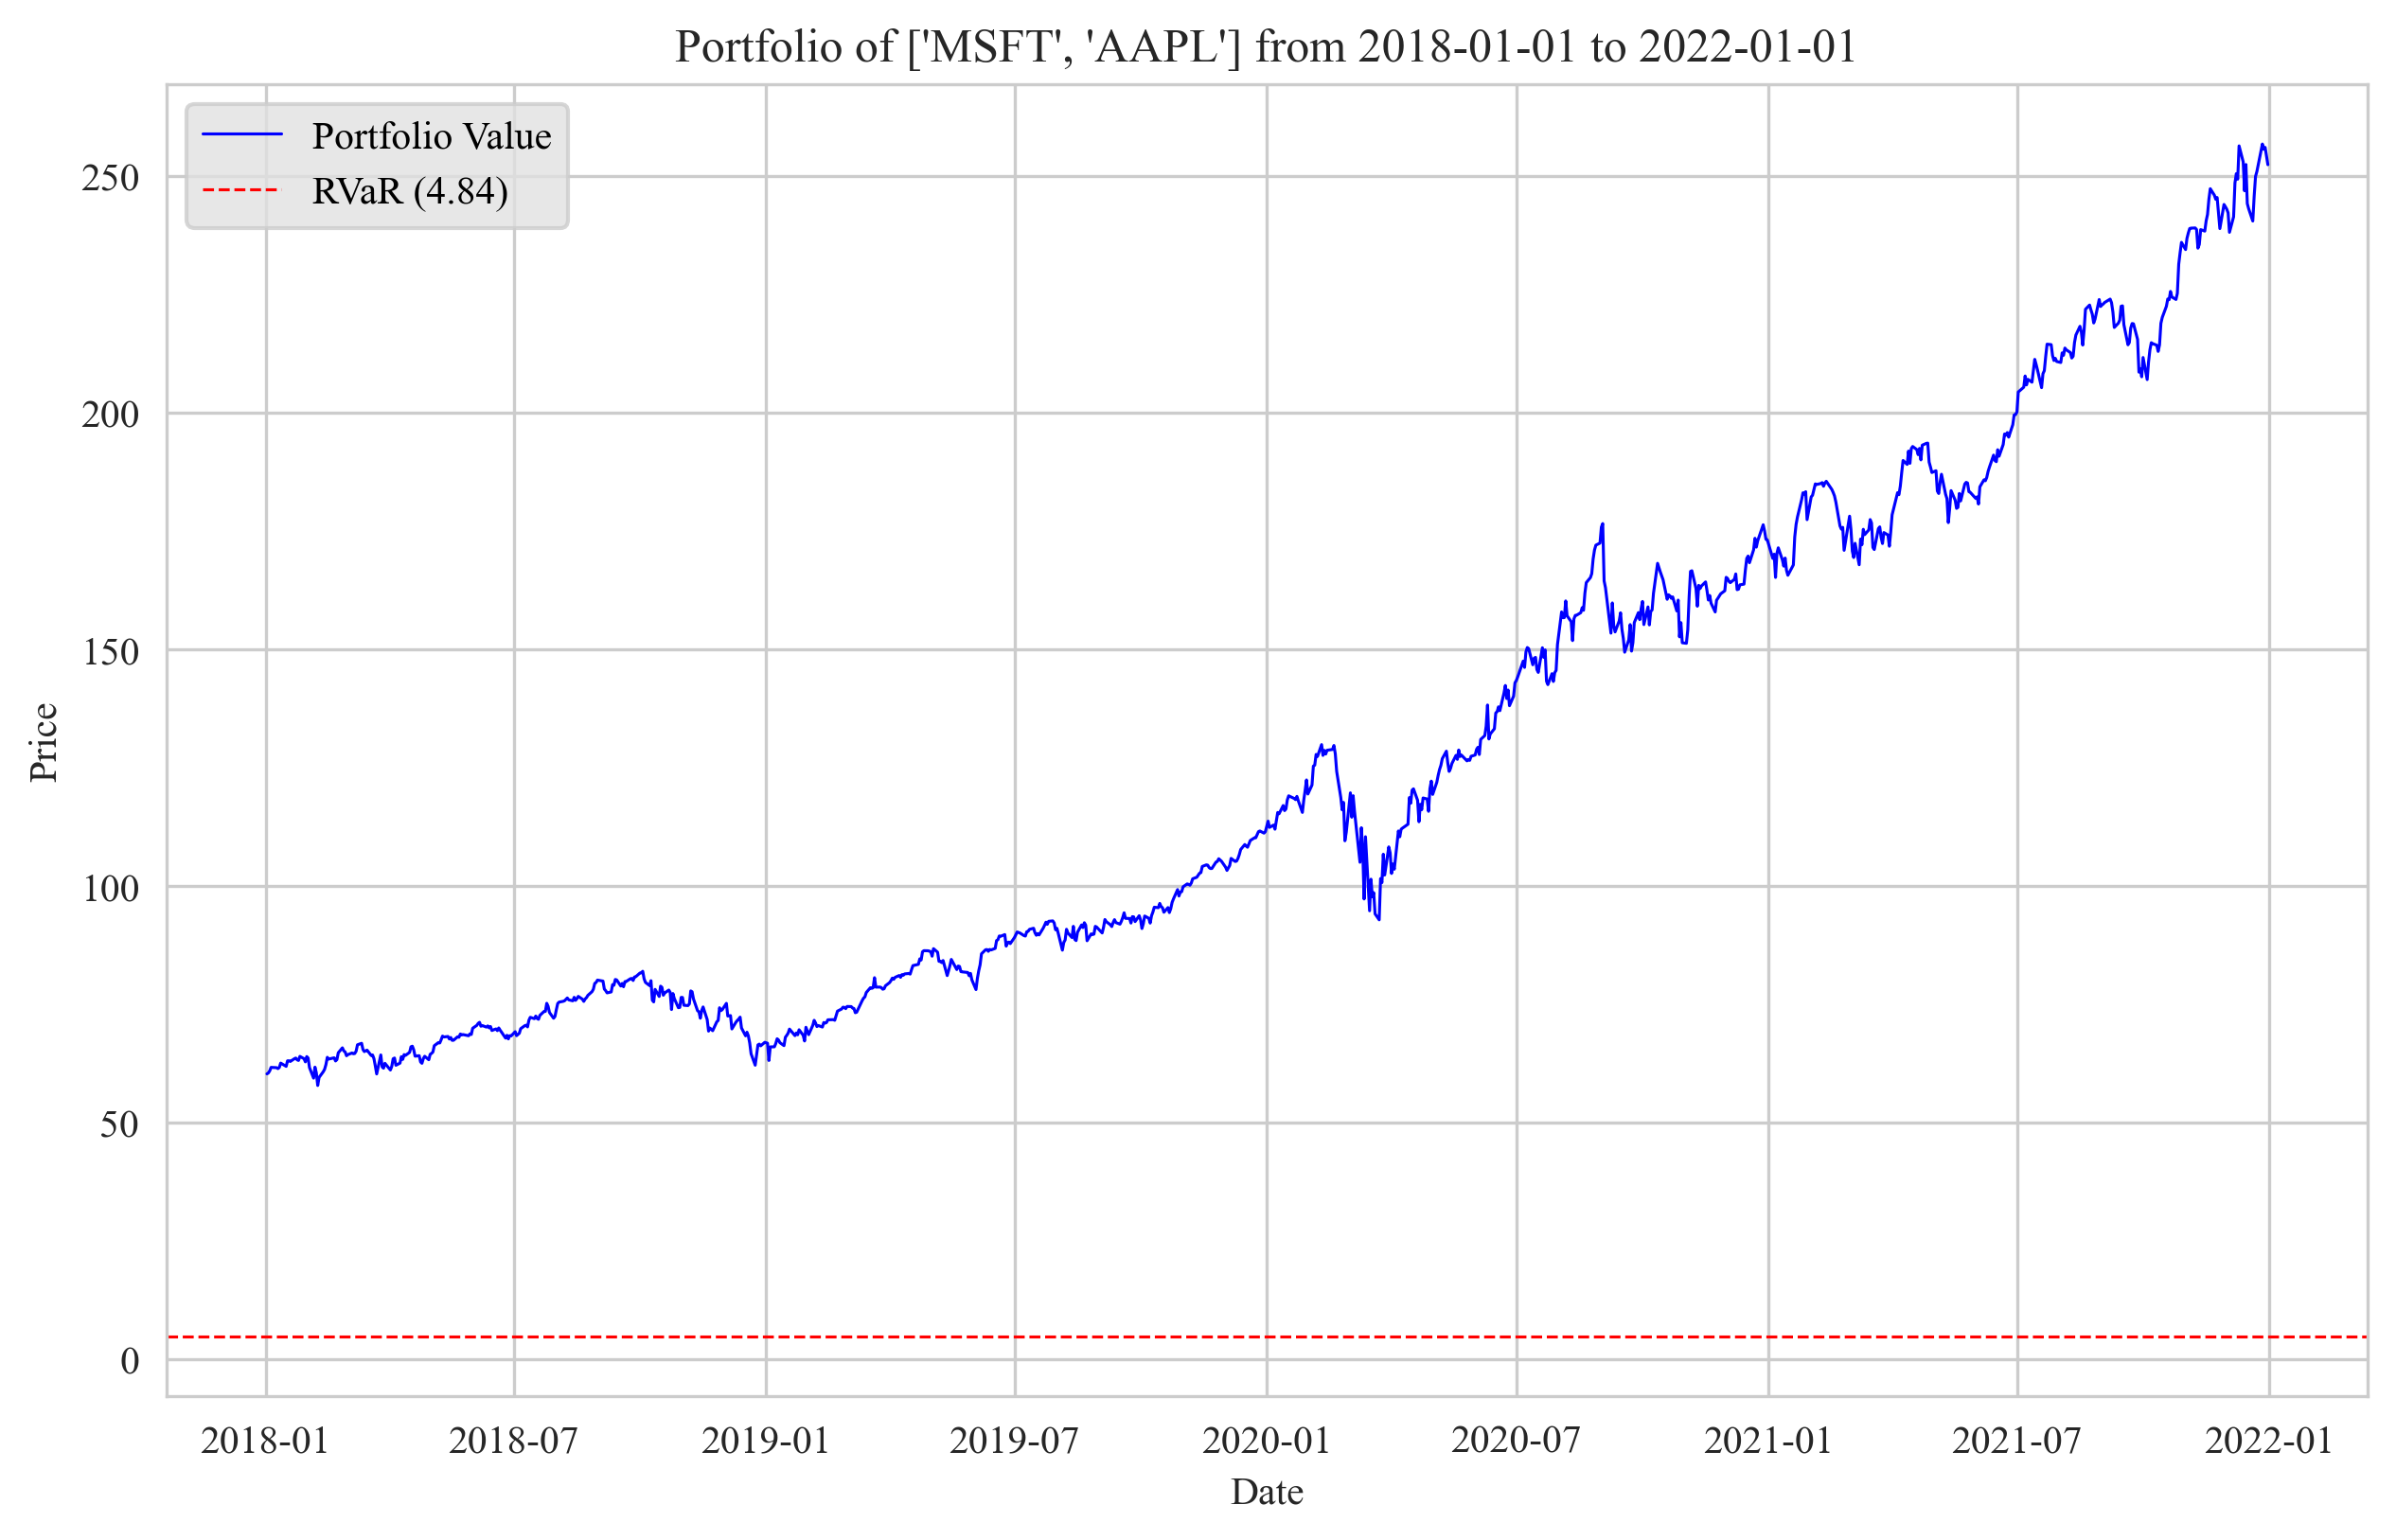

In [67]:
### USE WITH CAUTION - ALL FUNCTIONS ARE INCOMPLETE AND ARE STILL BEING TESTED FOR BUGS AND ERRORS
### THE CODE SO FAR CALCULATES THE RISK FUNCTIONS AT TIME HORIZON 1 DAY ONLY, ALTHOUGH THE CONFIDENCE LEVELS CAN VARY AS MUCH AS POSSIBLE 

def Historical_VaR(tickers, start_date, end_date, weights, alpha, show_performance_metrics = False, show_visualizations = False):
    assert (0 < alpha < 1) and type(len(tickers)) is int
    data = yf.download(tickers, start_date, end_date, progress = False)["Adj Close"]
    start = tm.time()
    data["Portfolio"] = np.dot(weights, data.T)
    portfolio = data["Portfolio"]
    PnL = data["Portfolio"].diff().dropna()
    VaR = -np.quantile(PnL, alpha)
    end = tm.time()
    if show_performance_metrics:
        computation_time = end - start
        print(f"Significance level: \u03B1 = {alpha}")
        print(f"Time horizon: 1 day")
        print(f"Estimated VaR: {VaR:.2f} units of local currency")
        print(f"Computation time: {computation_time:.3f} seconds")
    else:
        pass
    if show_visualizations:
        fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
        sns.lineplot(data = portfolio, linewidth = 0.75, color = "b", label = "Portfolio Value").set(xlabel = "Date", ylabel = "Price")
        plt.axhline(VaR, color = "black", linestyle = "--", linewidth = 0.75, label = f"VaR ({VaR:.2f})")
        plt.legend(labelcolor = "black", facecolor = "#E1E1E1")
        plt.title(f"Portfolio of {tickers} from {start_date} to {end_date}")
        plt.show()
    else:
        pass
    return VaR

def Historical_ES(tickers, start_date, end_date, weights, alpha = 0.05, show_performance_metrics = False, show_visualizations = False):
    assert (0 < alpha < 1) and type(len(tickers)) is int
    data = yf.download(tickers, start_date, end_date, progress = False)["Adj Close"]
    start = tm.time()
    data["Portfolio"] = np.dot(weights, data.T)
    portfolio = data["Portfolio"]
    PnL = data["Portfolio"].diff().dropna()
    VaR = -np.quantile(PnL, alpha)
    ES = np.mean(PnL[PnL > VaR])
    end = tm.time()
    if show_performance_metrics:
        computation_time = end - start
        print(f"Significance level: \u03B1 = {alpha}")
        print(f"Time horizon: 1 day")
        print(f"Estimated ES: {ES:.2f} units of local currency")
        print(f"Computation time: {computation_time:.3f} seconds")
    else:
        pass
    if show_visualizations:
        fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
        sns.lineplot(data = portfolio, linewidth = 0.75, color = "b", label = "Portfolio Value").set(xlabel = "Date", ylabel = "Price")
        plt.axhline(ES, color = "green", linestyle = "--", linewidth = 0.75, label = f"ES ({ES:.2f})")
        plt.legend(labelcolor = "black", facecolor = "#E1E1E1")
        plt.title(f"Portfolio of {tickers} from {start_date} to {end_date}")
        plt.show()
    else:
        pass
    return ES

def Historical_RVaR(tickers, start_date, end_date, weights, alpha = 0.05, beta = 0.01, show_performance_metrics = False, show_visualizations = False):
    assert (0 < beta < alpha < 1) and type(len(tickers)) is int
    data = yf.download(tickers, start_date, end_date, progress = False)["Adj Close"]
    start = tm.time()
    data["Portfolio"] = np.dot(weights, data.T)
    portfolio = data["Portfolio"]
    PnL = data["Portfolio"].diff().dropna()
    VaR_alpha = -np.quantile(PnL, alpha)
    VaR_beta = -np.quantile(PnL, beta)
    RVaR = np.mean(PnL[(VaR_alpha < PnL) & (PnL < VaR_beta)])
    end = tm.time()
    if show_performance_metrics:
        computation_time = end - start
        print(f"Lower significance level: \u03B1 = {alpha}")
        print(f"Upper significance level: \u03B2 = {beta}")
        print(f"Time horizon: 1 day")
        print(f"Estimated RVaR: {RVaR:.2f} units of local currency")
        print(f"Computation time: {computation_time:.3f} seconds")
    else:
        pass
    if show_visualizations:
        fig, ax = plt.subplots(figsize = (10, 6), dpi = 300)
        sns.lineplot(data = portfolio, linewidth = 0.75, color = "b", label = "Portfolio Value").set(xlabel = "Date", ylabel = "Price")
        plt.axhline(RVaR, color = "red", linestyle = "--", linewidth = 0.75, label = f"RVaR ({RVaR:.2f})")
        plt.legend(labelcolor = "black", facecolor = "#E1E1E1")
        plt.title(f"Portfolio of {tickers} from {start_date} to {end_date}")
        plt.show()
    else:
        pass
    return RVaR

VaR = Historical_VaR(tickers, start_date, end_date, weights, alpha, show_performance_metrics, show_visualizations)
ES = Historical_ES(tickers, start_date, end_date, weights, alpha, show_performance_metrics, show_visualizations)
RVaR = Historical_RVaR(tickers, start_date, end_date, weights, alpha, beta, show_performance_metrics, show_visualizations)

### SANITY CHECK
assert VaR <= RVaR <= ES

## **Parametric Method**
### **Application of the Parametric Method**
### **Python Implementation of the Parametric Method**

## **Monte Carlo Method**
### **Application of the Monte Carlo Method**
### **Python Implementation of the Monte Carlo Method**

## **Credits**
* Wikipedia contributors, "[Value at risk](https://en.wikipedia.org/w/index.php?title=Value_at_risk&oldid=1207006629)," Wikipedia, The Free Encyclopedia (accessed February 29, 2024).
* Wikipedia contributors, "[Expected shortfall](https://en.wikipedia.org/w/index.php?title=Expected_shortfall&oldid=1191488388)," Wikipedia, The Free Encyclopedia (accessed February 29, 2024).
* The original code is provided as-is in this project by Zakaria Zerrouki